# Housing Affordability Analysis

Observations

In [19]:
#import code dependencies
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import csv
from functools import reduce


In [2]:
#read CSV and create dataframe
AHI_df = pd.read_csv('AHI_DATA.csv')

#select applicable fields
AHI_df = AHI_df[['Zip Code','Unit Type', 'Housing Type', 'Status', 'Affordability Start Year']]
AHI_df= AHI_df.dropna(how = 'any')

#convert datatype to make it usable
AHI_df['Zip Code'] = AHI_df['Zip Code'].astype(np.int64)

#filter to only completed projects
# filtered_AHI_df = AHI_df[(AHI_df['Status']=='Project Complete')]
filtered_AHI_df = AHI_df[(AHI_df['Affordability Start Year']>=2012)]


#group by zip code
zipGroupBy_df = filtered_AHI_df.groupby(["Zip Code"])

#count each unit type and rename column
unitCount_df = pd.DataFrame(zipGroupBy_df['Unit Type'].value_counts())
unitCount_df2 = unitCount_df.rename(columns={'Unit Type': 'Count_by_Unit_Type'})


In [3]:
unitCount_df2.columns

Index(['Count_by_Unit_Type'], dtype='object')

In [4]:
#reset index
unitCount_df2.reset_index(inplace=True)

In [5]:
#calculate the data spread by unit type
unitCount_df2.groupby('Unit Type').sum()["Count_by_Unit_Type"]/unitCount_df2['Count_by_Unit_Type'].sum()*100

Unit Type
ADU              1
Duplex           4
FourPlex         3
Multifamily     32
Single Family   60
Name: Count_by_Unit_Type, dtype: float64

In [6]:
#create dataframes by unit types

multifam_filtered_df = unitCount_df2[(unitCount_df2['Unit Type']=="Multifamily")]
singlefam_filtered_df = unitCount_df2[(unitCount_df2['Unit Type']=="Single Family")]

In [7]:
#sort count from greatest to least
multifam_sorted_df = multifam_filtered_df.sort_values("Count_by_Unit_Type", ascending = False)
singlefam_sorted_df = singlefam_filtered_df.sort_values("Count_by_Unit_Type", ascending = False)

In [8]:
#print datafram
multifam_sorted_df

,Zip Code,Unit Type,Count_by_Unit_Type
6,78705,Multifamily,19
5,78704,Multifamily,13
3,78702,Multifamily,10
12,78723,Multifamily,4
18,78741,Multifamily,3
30,78756,Multifamily,3
1,78701,Multifamily,2
7,78717,Multifamily,1
15,78727,Multifamily,1
16,78735,Multifamily,1


In [9]:
#print dataframe
singlefam_sorted_df

,Zip Code,Unit Type,Count_by_Unit_Type
14,78724,Single Family,48
2,78702,Single Family,27
11,78723,Single Family,13
17,78741,Single Family,13
19,78744,Single Family,9
9,78722,Single Family,3
8,78721,Single Family,2
0,78617,Single Family,1
25,78750,Single Family,1


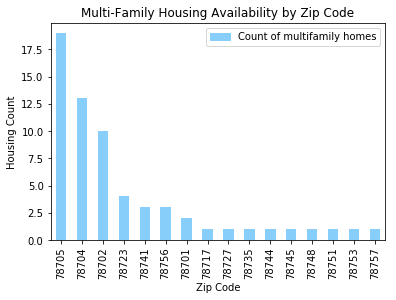

In [28]:
#plot multifamily bar graph showing count by zip

plt.figure(figsize=(12, 10))

fig = multifam_sorted_df.plot.bar(x='Zip Code', y='Count_by_Unit_Type', color = 'lightskyblue')

fig.set_title("Multi-Family Housing Availability by Zip Code")

fig.set_xlabel("Zip Code")

fig.set_ylabel("Housing Count")

blue_patch = mpatches.Patch(color='lightskyblue', label='Count of multifamily homes')
plt.legend(handles=[blue_patch])

imagepathprotocol = "outputs/bar_plot_multifamily_analysis.png"
plt.savefig(imagepathprotocol, bbox_inches='tight')

plt.show()

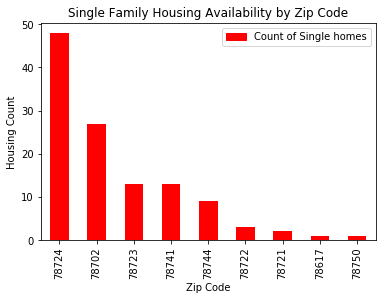

In [29]:
#plot single family bar graph showing count by zip
plt.figure(figsize=(12, 10))

fig = singlefam_sorted_df.plot.bar(x='Zip Code', y='Count_by_Unit_Type', color = 'r')

fig.set_title("Single Family Housing Availability by Zip Code")

fig.set_xlabel("Zip Code")

fig.set_ylabel("Housing Count")

red_patch = mpatches.Patch(color='r', label='Count of Single homes')
plt.legend(handles=[red_patch])

imagepathprotocol2 = "outputs/bar_plot_singlefamily_analysis.png"
plt.savefig(imagepathprotocol2, bbox_inches='tight')

plt.show()

In [ ]:
#over the years the housing availability has decreased with multifamily housing which could be a good indicator that 
#housing prices is going up because of the amount of houses availabel year over year. 
